# Previsão do tempo utilizando Random Forest

A previsão da máxima temperatura de amanhã será feita para a cidade de Seattle com base nos dados coletados pela [NOAA Climate Data Online Tool](https://www.ncdc.noaa.gov/cdo-web/) e está disponível para [download neste link](https://drive.google.com/file/d/1pko9oRmCllAxipZoa3aoztGZfPAD2iwj/view)

## Importação das bilbiotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Estilo do Pyplot
plt.style.use('fivethirtyeight')

## Importação do dataset

In [2]:
weather = pd.read_csv('https://raw.githubusercontent.com/Morsinaldo/artificial_intelligence/main/Datasets/temps.csv')
weather.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


Algumas informações sobre as colunas: 
  - `ano`: 2016 para todos os pontos de dados
  - `mês`: número do mês do ano
  - `dia`: número para o dia do ano
  - `semana`: dia da semana como uma cadeia de caracteres
  - `temp_2`: temperatura máxima 2 dias antes
  - `temp_1`: temperatura máxima 1 dia antes
  - `média`: temperatura máxima média histórica
  - `atual`: medição de temperatura máxima
  - `amigo`: a previsão do seu amigo, um número aleatório entre 20 abaixo da média e 20 acima da média

## EDA

In [3]:
weather.shape

(348, 12)

In [4]:
weather.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
# Encoding das variáveis categóricas
weather = pd.get_dummies(weather)
weather.iloc[:,5:].head()

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


## Train Test Split

In [6]:
# Separando a coluna alvo da base de treinamento
labels = np.array(weather['actual'])

weather = weather.drop('actual', axis=1)

In [7]:
# Salvando os nomes das features
feature_list = list(weather.columns)
weather = np.array(weather)

In [8]:
train_features, test_features, train_labels, test_labels = train_test_split(weather, labels, test_size = 0.25, random_state = 42)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


## Treinameto

In [10]:
# Instanciando um objeto do modelo
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Treinamento do modelo
rf.fit(train_features, train_labels);

## Previsões

In [11]:
# Realizando as previsões
predictions = rf.predict(test_features)
# Calculando o erro absoluto
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [12]:
# Calculando a média do erro absoluto
mape = 100 * (errors / test_labels)
# Calculando a acurácia
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


## Visualização de uma árvore de decisão

In [13]:
# Pegando uma árvore da floresta
tree = rf.estimators_[5]

# Exportando como uma imagem
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Criando um gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Escrevendo o gráfico como um arquivo PNG
graph.write_png('tree.png')

## Importância das variáveis

In [14]:
# Pegando as importâncias das variáveis numéricas
importances = list(rf.feature_importances_)
# Lista de tuplas com a variável e a importância
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Ordenando da maior para a menor importância
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


## Retreinando o modelo

In [15]:
# Nova Random Forest apenas com as duas colunas mais imporantes
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extraindo as duas colunas mais importantes
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Treinando o modelo
rf_most_important.fit(train_important, train_labels)

# Fazendo previsões e determinando o erro
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Métricas de avaliação
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


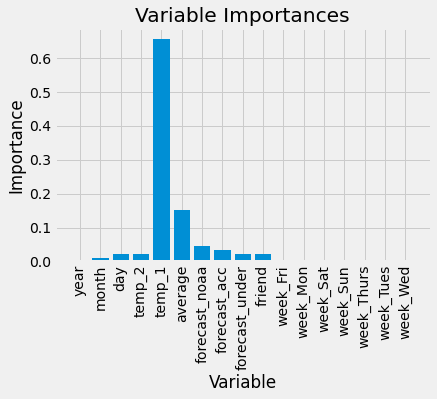

In [16]:
# lista com os valores do eixo x da importância
x_values = list(range(len(importances)))
# Gráfico de barra
plt.bar(x_values, importances, orientation = 'vertical')
# Rótulos do eixo x
plt.xticks(x_values, feature_list, rotation='vertical')
# Rótulos do eixo y e título
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

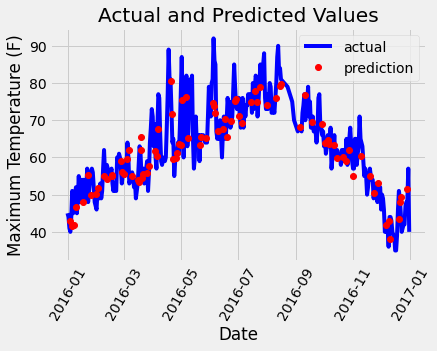

In [17]:
# Datas do treinamento
months = weather[:, feature_list.index('month')]
days = weather[:, feature_list.index('day')]
years = weather[:, feature_list.index('year')]

# Convertendo para um objeto datetime
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Criando um Dataframe os valores reais com as datas
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Datas das previsões
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Coluna das datas
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convertendo para objetos datetime
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe com as previsões e as datas
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plotando os valores atuais
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot os valores previstos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Rótulos dos gráficos
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## Reference

  - [Will Koehrsen](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0). Random Forest in Python.